r"""
Jackknife Calculations of Error on Mean
---------------------------------------
Figure 4.4.

The jackknife uncertainty estimates for the width of a Gaussian distribution.
This example uses the same data as figure 4.3. The upper panel shows a
histogram of the widths determined using the sample standard deviation, and
using the interquartile range. The lower panel shows the corrected jackknife
estimates (eqs. 4.33 and 4.35) for the two methods. The gray lines show the
theoretical results, given by eq. 3.35 for :math:`\sigma` and eq. 3.37 for
:math:`\sigma_G`. The result for :math:`\sigma` matches the theoretical
result almost exactly, but note the failure of the jackknife to correctly
estimate :math:`\sigma_G` (see the text for a discussion of this result).
"""

In [28]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt


In [29]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


In [30]:
# to enlarge the sizes
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# sample values from a normal distribution

In [31]:
#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
m = 1000  # number of points
data = norm(0, 1).rvs(m)

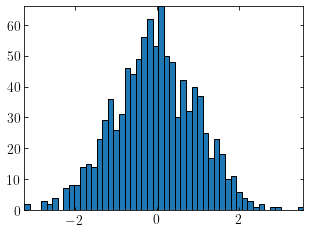

In [32]:
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.hist(data,bins=50);

# Compute jackknife resamplings of data

In [33]:
#------------------------------------------------------------
# Compute jackknife resamplings of data
from astroML.resample import jackknife
from astroML.stats import sigmaG

# mu1 is the mean of the standard-deviation-based width

In [34]:
# mu1 is the mean of the standard-deviation-based width
mu1, sigma_mu1, mu1_raw = jackknife(data, np.std,
                                    kwargs=dict(axis=1, ddof=1),
                                    return_raw_distribution=True)

In [35]:
mu1

1.0015366861435233

In [36]:
sigma_mu1

0.02228013942047898

In [37]:
#mu1_raw

Text(0.5, 1.0, 'mu1\\_raw Distribution')

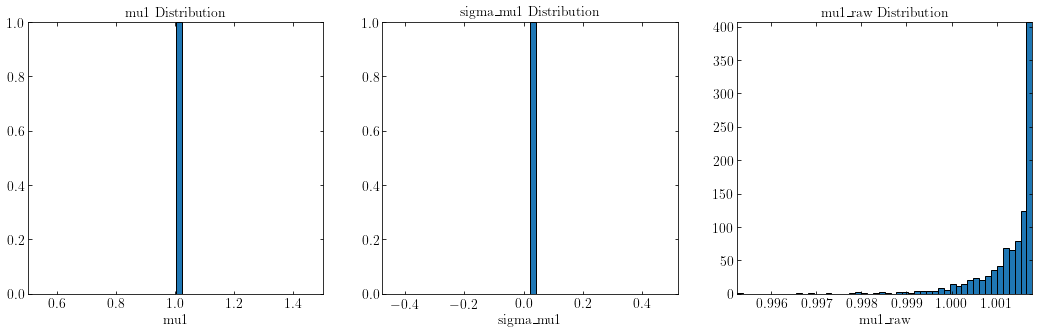

In [38]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(131)
ax.hist(mu1,bins=50);
ax.set_xlabel("mu1")
ax.set_title(" mu1 Distribution")
ax = fig.add_subplot(132)
ax.hist(sigma_mu1,bins=50);
ax.set_xlabel("sigma\_mu1")
ax.set_title("sigma\_mu1 Distribution")
ax = fig.add_subplot(133)
ax.hist(mu1_raw,bins=50);
ax.set_xlabel("mu1\_raw")
ax.set_title("mu1\_raw Distribution")

In [39]:
pdf1_theory = norm(1, 1. / np.sqrt(2 * (m - 1)))
pdf1_jackknife = norm(mu1, sigma_mu1)

In [42]:
# mu2 is the mean of the interquartile-based width
#  WARNING: do not use the following in practice.  This example
#           shows that jackknife fails for rank-based statistics.
mu2, sigma_mu2, mu2_raw = jackknife(data, sigmaG,
                                    kwargs=dict(axis=1),
                                    return_raw_distribution=True)
pdf2_theory = norm(data.std(), 1.06 / np.sqrt(m))
pdf2_jackknife = norm(mu2, sigma_mu2)
print(mu2, sigma_mu2)


0.597747861971019 0.031353107946452324


In [43]:
#------------------------------------------------------------
# plot the results
print("mu_1 mean: %.2f +- %.2f" % (mu1, sigma_mu1))
print("mu_2 mean: %.2f +- %.2f" % (mu2, sigma_mu2))


mu_1 mean: 1.00 +- 0.02
mu_2 mean: 0.60 +- 0.03


# plot the results

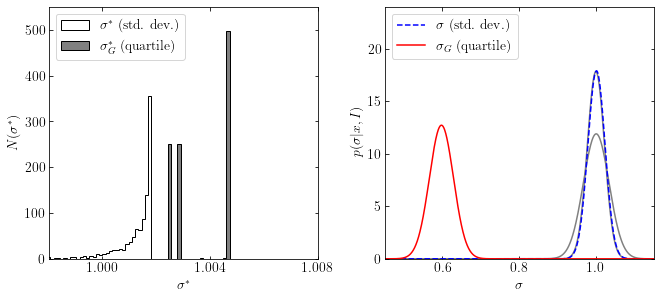

In [46]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax = fig.add_subplot(121)
ax.hist(mu1_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma^*\ {\rm (std.\ dev.)}$',
        histtype='stepfilled', fc='white', ec='black', density=False)
ax.hist(mu2_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma_G^*\ {\rm (quartile)}$',
        histtype='stepfilled', fc='gray', density=False)
ax.legend(loc='upper left', handlelength=2)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.004))
ax.set_xlabel(r'$\sigma^*$')
ax.set_ylabel(r'$N(\sigma^*)$')
ax.set_xlim(0.998, 1.008)
ax.set_ylim(0, 550)

ax = fig.add_subplot(122)
x = np.linspace(0.45, 1.15, 1000)
ax.plot(x, pdf1_jackknife.pdf(x),
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std.\ dev.)}$',
        zorder=2)
ax.plot(x, pdf1_theory.pdf(x), color='gray', zorder=1)
ax.plot(x, pdf2_jackknife.pdf(x),
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$', zorder=2)
ax.plot(x, pdf2_theory.pdf(x), color='gray', zorder=1)
plt.legend(loc='upper left', handlelength=2)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.set_xlim(0.45, 1.15)
ax.set_ylim(0, 24)

plt.show()
